In [1]:
#Step 1:Deciding not to segment 
#Step 2:Specifying the ideal target segment

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Step 3: Collecting Data
mcdonalds = pd.read_csv('mcdonalds.csv')

In [3]:
#Step 4: Exploring the data
column_names = mcdonalds.columns
print(column_names)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
dimension = mcdonalds.shape
print(dimension)
mcdonalds.sample(n=3)

(1453, 15)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1310,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+4,27,More than once a week,Male
824,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,No,+3,47,Once a week,Male
1239,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,+2,44,Once a month,Male


In [5]:
MDx = mcdonalds.iloc[:, 0:11].values
MDx = (MDx == "Yes").astype(int)

col_means = np.round(np.mean(MDx, axis=0), 2)
for name, mean in zip(column_names, col_means):
    print(f"{name}: {mean}")

yummy: 0.55
convenient: 0.91
spicy: 0.09
fattening: 0.87
greasy: 0.53
fast: 0.9
cheap: 0.6
tasty: 0.64
expensive: 0.36
healthy: 0.2
disgusting: 0.24


In [6]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit_transform(MDx)

print("PCA Summary:")
for i, (std_dev, prop_var, cum_var) in enumerate(zip(pca.explained_variance_, pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_)), 1):
    print(f"PC-{i}:")
    print(f"  Standard deviation: {np.round(std_dev, 2)}")
    print(f"  Proportion of variance: {np.round(prop_var, 2)}")
    print(f"  Cumulative proportion of variance: {np.round(cum_var, 2)}")

PCA Summary:
PC-1:
  Standard deviation: 0.57
  Proportion of variance: 0.3
  Cumulative proportion of variance: 0.3
PC-2:
  Standard deviation: 0.37
  Proportion of variance: 0.19
  Cumulative proportion of variance: 0.49
PC-3:
  Standard deviation: 0.25
  Proportion of variance: 0.13
  Cumulative proportion of variance: 0.63
PC-4:
  Standard deviation: 0.16
  Proportion of variance: 0.08
  Cumulative proportion of variance: 0.71
PC-5:
  Standard deviation: 0.11
  Proportion of variance: 0.06
  Cumulative proportion of variance: 0.77
PC-6:
  Standard deviation: 0.1
  Proportion of variance: 0.05
  Cumulative proportion of variance: 0.82
PC-7:
  Standard deviation: 0.08
  Proportion of variance: 0.04
  Cumulative proportion of variance: 0.86
PC-8:
  Standard deviation: 0.08
  Proportion of variance: 0.04
  Cumulative proportion of variance: 0.9
PC-9:
  Standard deviation: 0.07
  Proportion of variance: 0.04
  Cumulative proportion of variance: 0.94
PC-10:
  Standard deviation: 0.06
  P

In [7]:
print("PCA Results:")
pca_results = pd.DataFrame(MD_pca, columns=[f"PC-{i}" for i in range(1, pca.n_components_+1)])
pca_results.columns = [f"PC-{i}: {col}" for i, col in enumerate(mcdonalds.columns[:11], 1)]
print(pca_results)

PCA Results:
      PC-1: yummy  PC-2: convenient  PC-3: spicy  PC-4: fattening  \
0        0.425367         -0.219079     0.663255        -0.401300   
1       -0.218638          0.388190    -0.730827        -0.094724   
2        0.375415          0.730435    -0.122040         0.692262   
3       -0.172926         -0.352752    -0.843795         0.206998   
4        0.187057         -0.807610     0.028537         0.548332   
...           ...               ...          ...              ...   
1448     1.550242          0.275031    -0.013737         0.200604   
1449    -0.957339          0.014308     0.303843         0.444350   
1450    -0.185894          1.062662     0.220857        -0.467643   
1451    -1.182064         -0.038570     0.561561         0.701126   
1452     1.550242          0.275031    -0.013737         0.200604   

      PC-5: greasy  PC-6: fast  PC-7: cheap  PC-8: tasty  PC-9: expensive  \
0         0.201705   -0.389767    -0.211982     0.163235         0.181007   
1   

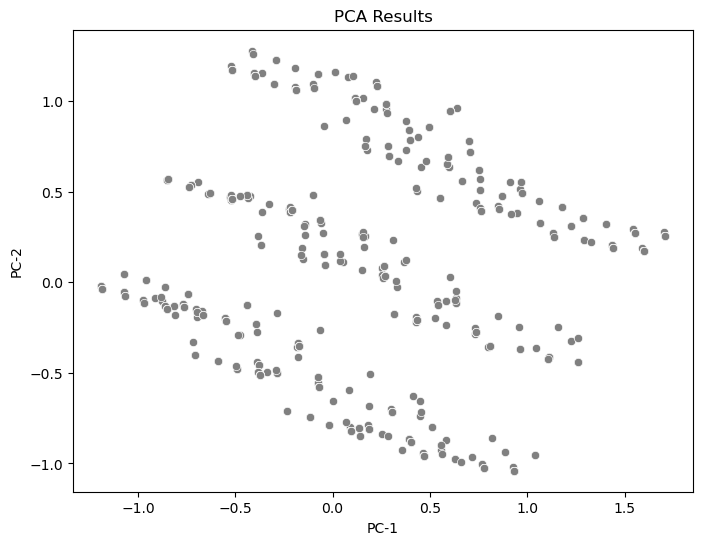

In [8]:
#using seaborns and matplotlib to plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=MD_pca, x=MD_pca[:, 0], y=MD_pca[:, 1], color='grey')
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.title("PCA Results")
plt.show()

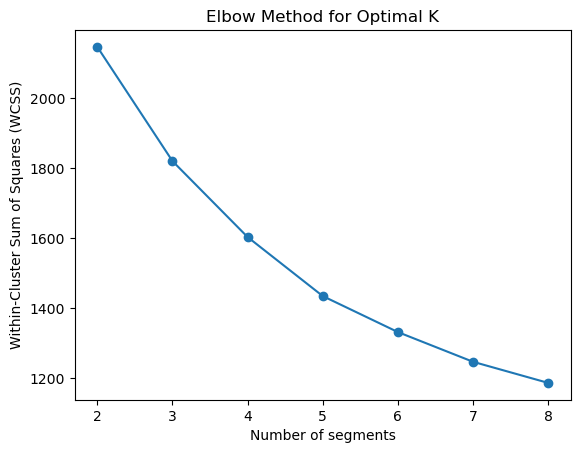

In [9]:
#Step 5: Extracting segements
from sklearn.cluster import KMeans
np.random.seed(1234)
k_values = range(2, 9)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MDx)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

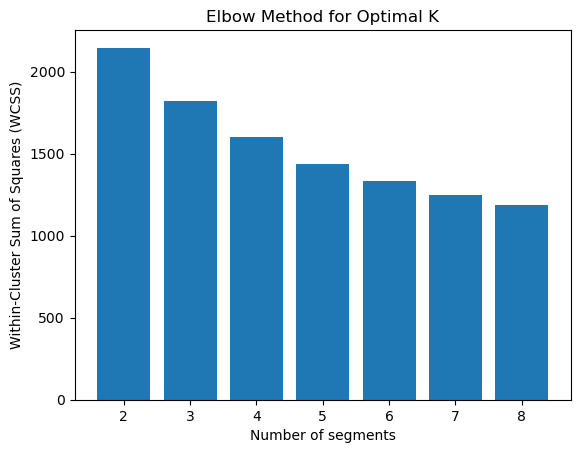

In [10]:
plt.bar(k_values, wcss)
plt.xlabel("Number of segments")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

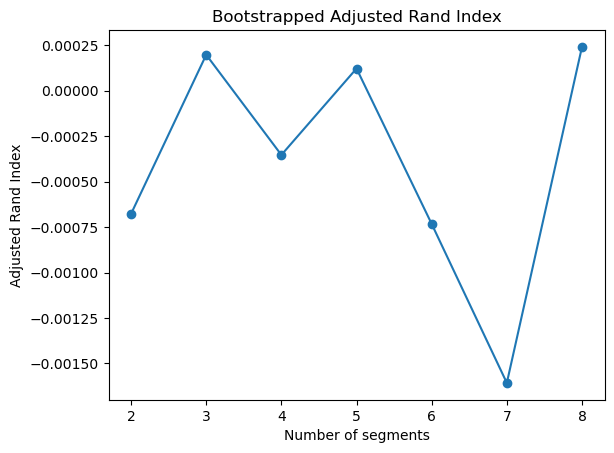

In [11]:
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
k_values = range(2, 9)
adj_rand_indices = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    boot_rand_indices = []
    
    for _ in range(100):
        bootstrap_samples = resample(MDx, random_state=1234)
        kmeans.fit(bootstrap_samples)
        labels = kmeans.labels_
        boot_rand_indices.append(adjusted_rand_score(labels, kmeans.predict(MDx)))

    adj_rand_indices.append(np.mean(boot_rand_indices))

# Plot the results
plt.plot(k_values, adj_rand_indices, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrapped Adjusted Rand Index")
plt.show()

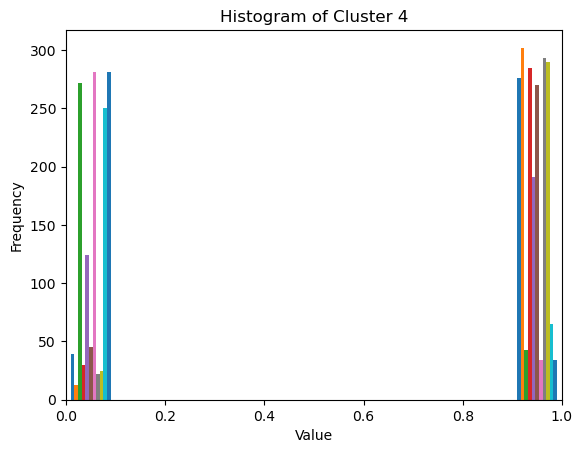

In [12]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans.fit(MDx)
cluster_labels = kmeans.labels_

cluster_4_indices = np.where(cluster_labels == 3)[0]  # Adjust index to match Python's 0-based indexing
cluster_4_data = MDx[cluster_4_indices]

plt.hist(cluster_4_data, bins=np.linspace(0, 1, 11))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Cluster 4")
plt.xlim(0, 1)
plt.show()

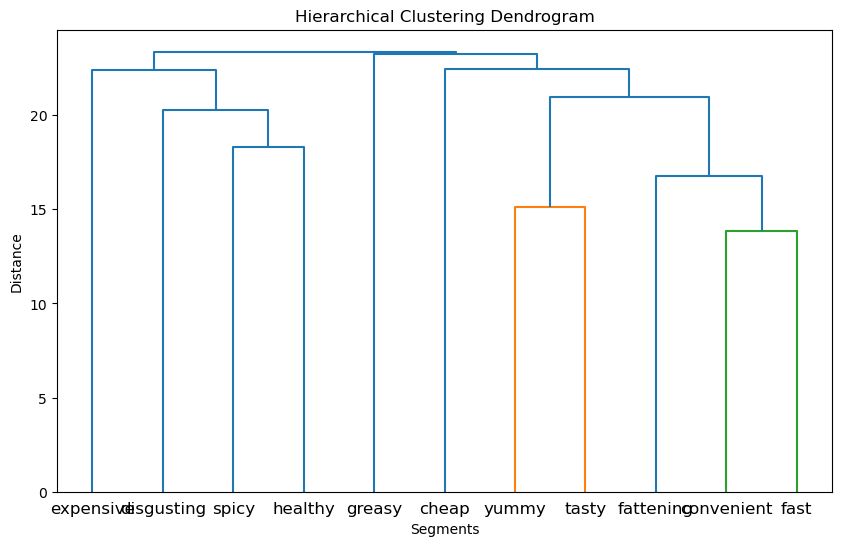

In [13]:
#Step 6: Profiling Segements
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
MD_distances = distance.pdist(np.transpose(MDx))
MD_vclust = linkage(MD_distances)

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, labels=column_names[:11])
plt.xlabel("Segments")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


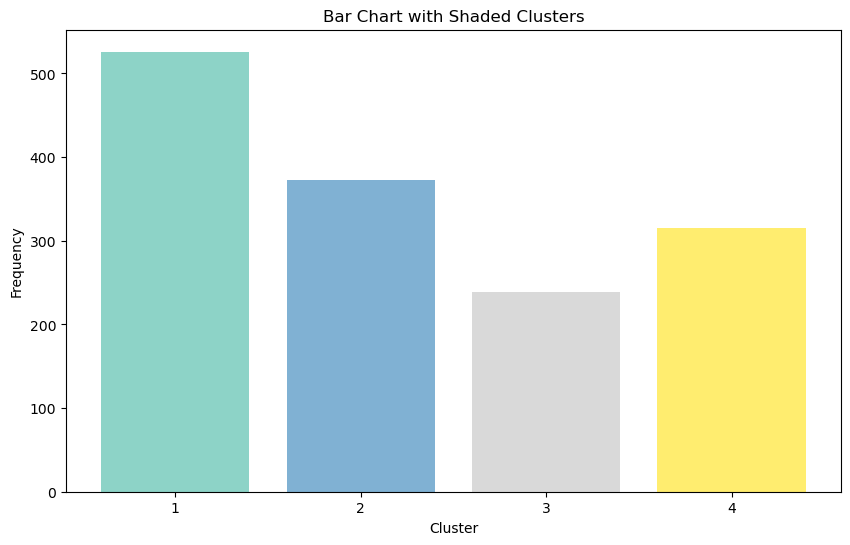

In [14]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans.fit(MDx)
MD_k4_labels = kmeans.labels_

# Calculate the cluster counts
cluster_counts = np.bincount(MD_k4_labels)

# Create a colormap
cmap = plt.cm.get_cmap('Set3')

# Plot the bar chart with shaded clusters
plt.figure(figsize=(10, 6))
bar_positions = np.arange(1, len(cluster_counts) + 1)
bar_colors = [cmap(i) for i in np.linspace(0, 1, len(cluster_counts))]
plt.bar(bar_positions, cluster_counts, color=bar_colors)

# Adjust tick locations and labels
plt.xticks(bar_positions, [int(x) for x in bar_positions])

# Set the axis labels and title
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.title("Bar Chart with Shaded Clusters")

plt.show()


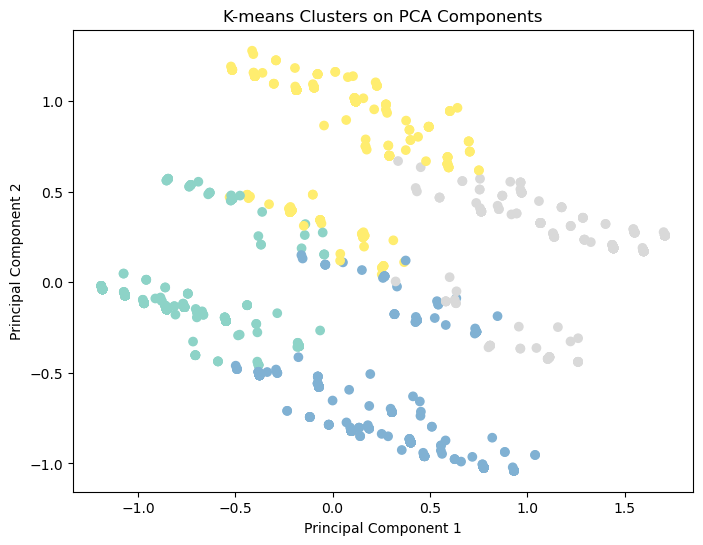

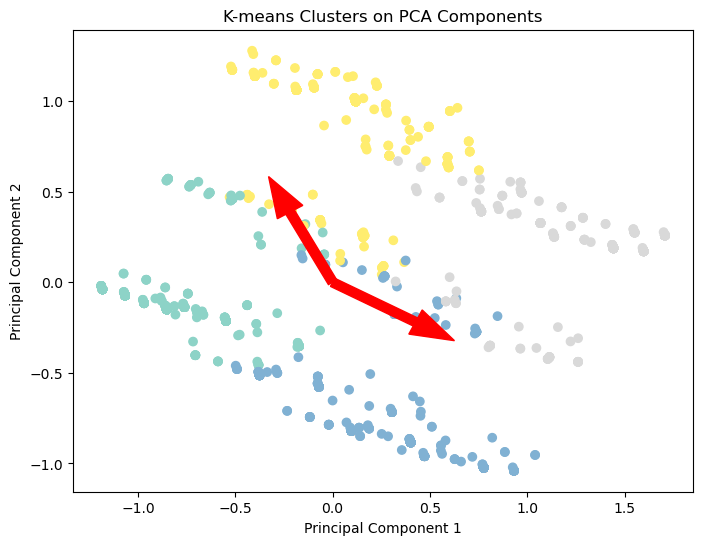

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4_labels, cmap='Set3')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clusters on PCA Components")
plt.show()

# Plotting the projection axes
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4_labels, cmap='Set3')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clusters on PCA Components")

# Add projection axes
plt.arrow(0, 0, MD_pca[0, 0], MD_pca[0, 1], color='red', width=0.05)
plt.arrow(0, 0, MD_pca[1, 0], MD_pca[1, 1], color='red', width=0.05)

plt.show()


<Figure size 800x600 with 0 Axes>

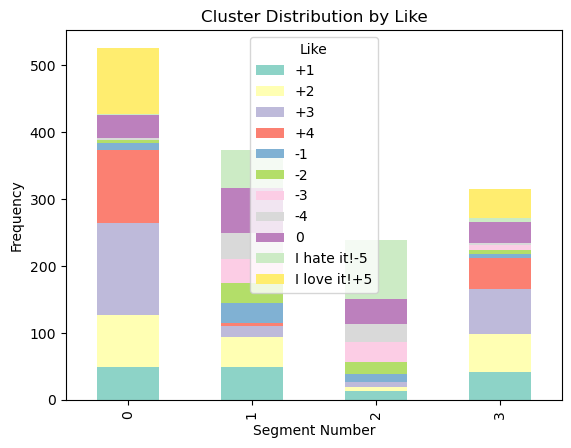

In [16]:
#Step 7: Decribing Segments
import matplotlib.pyplot as plt

# Get the cluster distribution
cluster_counts = np.bincount(MD_k4_labels)

# Get the "Like" column from the original data
like_column = mcdonalds['Like']

# Calculate the frequency of each combination of cluster and "Like"
cluster_like_counts = pd.crosstab(MD_k4_labels, like_column)

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, cluster_like_counts.shape[1]))
cluster_like_counts.plot(kind='bar', stacked=True, color=colors)

# Set the labels and title
plt.xlabel("Segment Number")
plt.ylabel("Frequency")
plt.title("Cluster Distribution by Like")

plt.show()


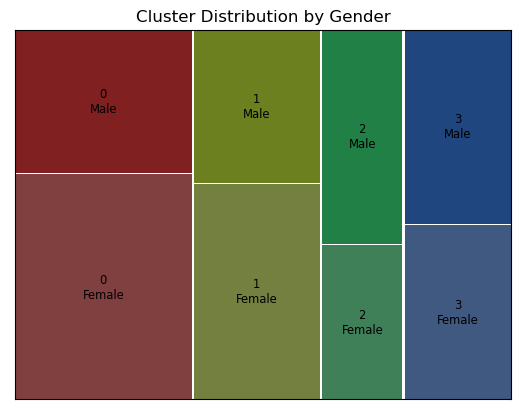

In [17]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a DataFrame with cluster labels and gender
cluster_gender_df = pd.DataFrame({'Cluster': MD_k4_labels, 'Gender': mcdonalds['Gender']})

# Compute the contingency table
contingency_table = pd.crosstab(cluster_gender_df['Cluster'], cluster_gender_df['Gender'])

# Plot the mosaic plot
mosaic(contingency_table.stack(), title='Cluster Distribution by Gender', axes_label=False)

# Show the plot
plt.show()

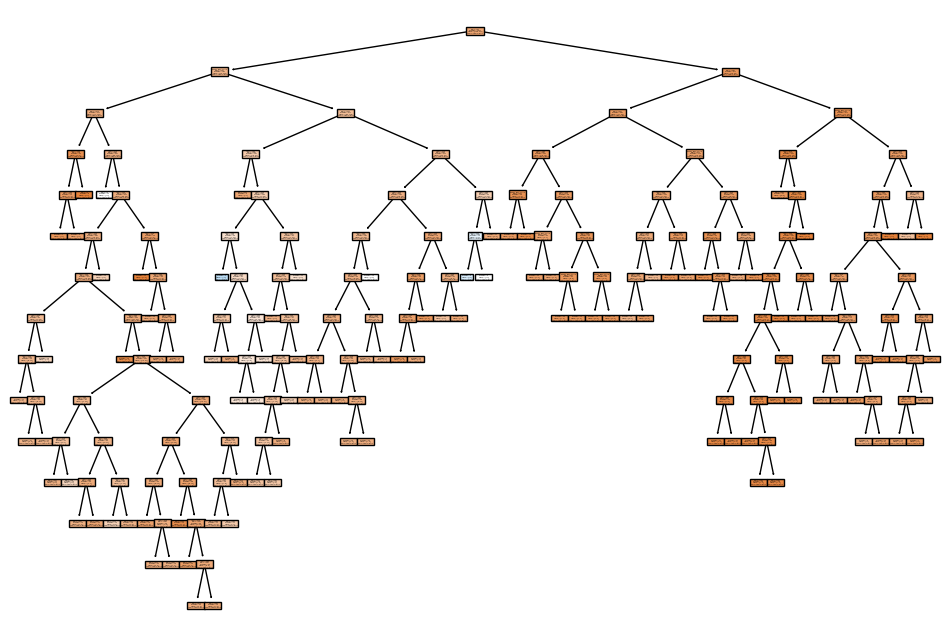

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder

# Convert k4 == 3 to binary
MD_k4_binary = (MD_k4_labels == 3).astype(int)

# Create a DataFrame with the required variables
df = pd.DataFrame({'Cluster': MD_k4_binary, 'Age': mcdonalds['Age'], 'Gender': mcdonalds['Gender']})

# Perform one-hot encoding on the 'Gender' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_gender = pd.DataFrame(encoder.fit_transform(df[['Gender']]), columns=['Gender_Male'])
df_encoded = pd.concat([df, encoded_gender], axis=1).drop('Gender', axis=1)

# Create the decision tree
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(df_encoded.drop('Cluster', axis=1), df_encoded['Cluster'])

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=df_encoded.columns[1:], class_names=['Other Clusters', 'Cluster 3'], filled=True)

plt.show()


In [19]:
#Step 8 : Selecting the Target Segments
visit = mcdonalds.groupby(MD_k4_labels)['VisitFrequency'].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).mean()
print(visit)


0.0


In [20]:
like = mcdonalds['Like'].apply(pd.to_numeric, errors='coerce').groupby(MD_k4_labels).mean()
print(like)


0    2.407059
1   -0.454259
2   -1.313333
3    1.849624
Name: Like, dtype: float64


In [21]:
female = mcdonalds['Gender'].eq('Female').astype(int).groupby(MD_k4_labels).mean()
print(female)


0    0.610266
1    0.584450
2    0.418410
3    0.473016
Name: Gender, dtype: float64


In [ ]:
#Step 9: Customising Marketing Mix
#Step 10: Evaluation and Montioring